<a href="https://colab.research.google.com/github/njsuriya/ML_clf_algorithms/blob/main/digit_knn_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [3]:
digits = datasets.load_digits()
digit_df = pd.DataFrame(digits.data,columns=digits.feature_names)
digit_df['number'] = digits.target

In [ ]:
digit_df

In [6]:
input,output = digit_df.drop(['number'],axis = 1), digit_df['number']
x_train,x_test,y_train,y_test = train_test_split(input,output)

In [7]:
def train_knnmodel_with_kvalues(k):
  start = time.perf_counter()
  knn_clf = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
  train_time = time.perf_counter() - start
  return train_time,knn_clf

In [13]:
def test_knnmodel(model):
  start = time.perf_counter()
  clf_pred = model.predict(x_test)
  test_time = time.perf_counter() - start
  prediction_score = accuracy_score(y_test,clf_pred)
  return test_time,prediction_score

In [24]:
accu_score = list()
train_time = list()
pred_time = list()
for n_neighbour in range(1,1000):
  _train_time, knnmodel = train_knnmodel_with_kvalues(n_neighbour)
  _test_time, score =test_knnmodel(knnmodel)
  accu_score.append(score)
  train_time.append(_train_time)
  pred_time.append(_test_time)
  #print("KValue:::"+str(n_neighbour)+" Training Time:::"+str(_train_time)+" PredctionTime:::"+str(_test_time)+" Score:::"+str(score))

<function matplotlib.pyplot.show(*args, **kw)>

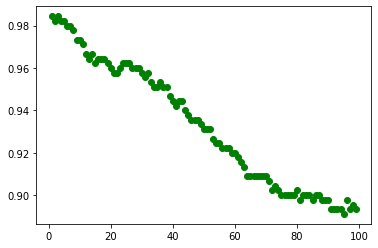

In [21]:
plt.plot(range(1,100),accu_score[:99],'go')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

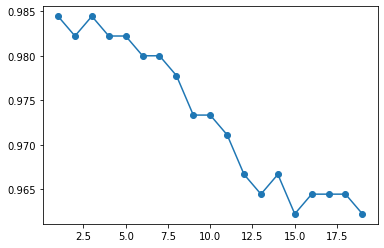

In [23]:
plt.plot(range(1,20),accu_score[:19],marker = 'o')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

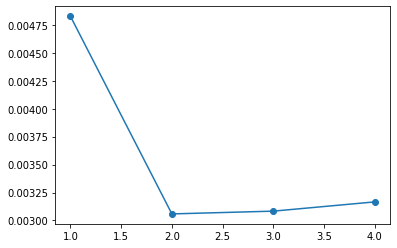

In [28]:
plt.plot(range(1,5),train_time[:4],marker = 'o')
plt.show